In [0]:
from google.colab import files
upload = files.upload()

Saving tips.csv to tips.csv


In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Preparing the kernel for prediction
# 
def kernel(point, xmat, k):
    # m, n will store the shape of the matrix.
    m, n = np.shape(xmat)
    # np.eye will return a unit matrix(1 at the diagonal and 0 everywhere else) and np.mat will convert it to a matrix.
    weights = np.mat(np.eye((m)))
    for j in range(m):
        # point is an array with elements of 1 [1, 5.54]
        # X is the orignal array made and diff is point - every 2element array in the orignal array
        diff = point - X[j]
        # diff*diff.T to calculate the transpose of the array fist and then multiply k is the kNN distance.
        weights[j, j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

In [5]:
def localWeight(point, xmat, ymat, k):
    wei = kernel(point, xmat, k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

In [6]:
def localWeightRegression(xmat, ymat, k):
    m, n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i], xmat, ymat, k)
    return ypred

In [7]:
def graphPlot(X, ypred):
    sortindex = X[:,1].argsort(0)
    xsort = X[sortindex][:, 0]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(bill, tip, color='green')
    ax.plot(xsort[:, 1], ypred[sortindex], color = 'red', linewidth = 5)
    plt.xlabel('Total bill')
    plt.ylabel('Tip')
    plt.show()

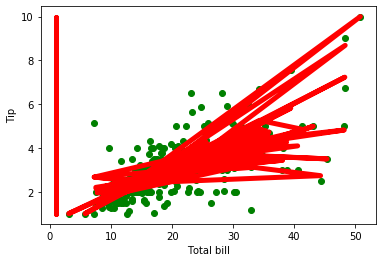

In [8]:
# Importing the dataset tips.csv.
data = pd.read_csv("tips.csv")
# Make an array of "total bill" from the dataset.
bill = np.array(data.total_bill)
# Make an array of "tips" from the dataset.
tip = np.array(data.tip)
# convert the bill array to a 2d array by converting it into a matrix.
mbill = np.mat(bill)
# convert the tips array to a 2d array by converting it into a matrix.
mtip = np.mat(tip)
# m is initialized to the size of the bill array or the first row of the mbill matrix.
m = mbill.shape[1]
# one is a 2d array or matrix of size m in which all the elements are initialized to "1".
one = np.mat(np.ones(m))
# np.hstack stacks one array on top of another and doing so combines the array into one and "one.T" accesses the attributes of the array and makes a transpose of array.
# X = np.hstack((one, mbill)) # uncomment to see the difference note the double bracket needed in hstack.
X = np.hstack((one.T, mbill.T))
# This will generate the predictions using localWeightRegression.
ypred = localWeightRegression(X, mtip, 0.5) # 0.5 is the amount of fitting to be done. change the number to make graph more general.
# Plot the graph of data to prediction and also map a straight line.
graphPlot(X, ypred)

In [0]:
a = [0, 0.54]
b = np.mat(a)
print(b*b.T)

[[0.2916]]
